An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

In [1]:
#import all libraries reuqired for data cleaning
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
#accesing the file request from file folder
#path of file directory
file_path = r"C:\Users\Dell\Desktop\codsoft task\test.csv"

#opening the file content int read mode
with open(file_path) as company_data:
    company_data = pd.read_csv(file_path)
    print(company_data.columns)

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')


In [5]:
#finding the total number of size or indepth of dataset 
size_data = company_data.size
if size_data > (5000):
    print(f" size of data containing  :{size_data}")
else:
    print(f" actual size of data :{size_data}")

 size of data containing  :26270


In [7]:
#seperation of total number of rows and total number of columns 
number_of_rows_columns = company_data.shape


#accesing the total number of rows and total number of columns
total_number_of_rows = number_of_rows_columns[-2]
total_number_of_columns = number_of_rows_columns[-1]

#result 
if total_number_of_rows in number_of_rows_columns and number_of_rows_columns:
    print(f" total number of rows :{total_number_of_rows}")
    print(f" total_number of columns :{total_number_of_columns}")

 total number of rows :2627
 total_number of columns :10


In [9]:
#geting the sumary and descriptive summary of all columns 
def get_summary_info(company_data):
    summary = company_data.apply(lambda x:x.info())
    return summary 

def get_descriptive_summary(company_data):
    descriptive_summary = company_data.apply(lambda x:x.describe())
    return descriptive_summary

#calling the above two funcation to get the return value
summary = get_summary_info(company_data)
descriptive_summary = get_descriptive_summary(company_data)
print(summary.head(5))
print(descriptive_summary.head(5))

<class 'pandas.core.series.Series'>
RangeIndex: 2627 entries, 0 to 2626
Series name: ID
Non-Null Count  Dtype
--------------  -----
2627 non-null   int64
dtypes: int64(1)
memory usage: 20.7 KB
<class 'pandas.core.series.Series'>
RangeIndex: 2627 entries, 0 to 2626
Series name: Gender
Non-Null Count  Dtype 
--------------  ----- 
2627 non-null   object
dtypes: object(1)
memory usage: 20.7+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 2627 entries, 0 to 2626
Series name: Ever_Married
Non-Null Count  Dtype 
--------------  ----- 
2577 non-null   object
dtypes: object(1)
memory usage: 20.7+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 2627 entries, 0 to 2626
Series name: Age
Non-Null Count  Dtype
--------------  -----
2627 non-null   int64
dtypes: int64(1)
memory usage: 20.7 KB
<class 'pandas.core.series.Series'>
RangeIndex: 2627 entries, 0 to 2626
Series name: Graduated
Non-Null Count  Dtype 
--------------  ----- 
2603 non-null   object
dtypes: object(1)
memory usage: 20.7+ K

In [11]:
def nan_value(company_data):
    company_data.loc[company_data=="NaN"]
    return company_data

Profession =nan_value(company_data["Profession"])
Work_Experience =nan_value(company_data["Work_Experience"])
Spending_score =nan_value(company_data["Spending_Score"])
family_size =nan_value(company_data["Family_Size"])
Gender = nan_value(company_data["Gender"])
Graduated = nan_value(company_data["Graduated"])

print(Profession)
print(Work_Experience)
print(Spending_score)
print(family_size)
print(Gender)

0            Engineer
1          Healthcare
2                 NaN
3           Executive
4           Marketing
            ...      
2622       Healthcare
2623           Doctor
2624    Entertainment
2625        Executive
2626       Healthcare
Name: Profession, Length: 2627, dtype: object
0        0.0
1        8.0
2        0.0
3       11.0
4        NaN
        ... 
2622     9.0
2623     1.0
2624     NaN
2625     1.0
2626     9.0
Name: Work_Experience, Length: 2627, dtype: float64
0           Low
1       Average
2           Low
3          High
4           Low
         ...   
2622        Low
2623        Low
2624        Low
2625       High
2626        Low
Name: Spending_Score, Length: 2627, dtype: object
0       1.0
1       4.0
2       1.0
3       2.0
4       4.0
       ... 
2622    4.0
2623    1.0
2624    2.0
2625    5.0
2626    3.0
Name: Family_Size, Length: 2627, dtype: float64
0       Female
1         Male
2       Female
3         Male
4       Female
         ...  
2622      Male
2623  

In [13]:
#now getting the null value and duplicate value 
def get_null_value(company_data):
    if company_data.empty:
        print("empty dataset")
    null_value = company_data.apply(lambda x: x.isnull().sum())
    sum_null_columns = null_value.sum()
    percentage_of_null_columns = (sum_null_columns / len(company_data)) * 100
    print(f"Percentage of missing values in columns: {percentage_of_null_columns:.2f}%")
    return null_value

# calling the function
get_null_value(company_data)

Percentage of missing values in columns: 20.02%


ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [15]:
#fiiling the nan value 
def filling_value(company_data):
    for col in company_data.columns:
        if company_data[col].dtype == 'object':
            company_data[col].fillna(np.random.choice(company_data[col].dropna().unique()), inplace=True)
        elif company_data[col].dtype == 'int32':
            company_data[col].fillna(company_data[col].mode()[0], inplace=True)
        elif company_data[col].dtype == 'float64':
            company_data[col].fillna(company_data[col].mode()[0], inplace=True)
    return company_data

company_data = filling_value(company_data)
company_data

ID  Gender Ever_Married  Age Graduated     Profession  \
0     458989  Female          Yes   36       Yes       Engineer   
1     458994    Male          Yes   37       Yes     Healthcare   
2     458996  Female          Yes   69        No      Homemaker   
3     459000    Male          Yes   59        No      Executive   
4     459001  Female           No   19        No      Marketing   
...      ...     ...          ...  ...       ...            ...   
2622  467954    Male           No   29        No     Healthcare   
2623  467958  Female           No   35       Yes         Doctor   
2624  467960  Female           No   53       Yes  Entertainment   
2625  467961    Male          Yes   47       Yes      Executive   
2626  467968  Female           No   43       Yes     Healthcare   

      Work_Experience Spending_Score  Family_Size  Var_1  
0                 0.0            Low          1.0  Cat_6  
1                 8.0        Average          4.0  Cat_6  
2                 0.0            Low          1.0  Cat_6  
3                11.0           High          2.0  Cat_6  
4                 1.0            Low          4.0  Cat_6  
...               ...            ...          ...    ...  
2622              9.0            Low          4.0  Cat_6  
2623              1.0            Low          1.0  Cat_6  
2624              1.0            Low          2.0  Cat_6  
2625              1.0           High          5.0  Cat_4  
2626              9.0            Low          3.0  Cat_7  

[2627 rows x 10 columns]

In [17]:
try:
    remove = company_data.dropna(inplace=True)
except:
    print("error")

company_data.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [19]:
#since most of value maybe containing same value which can be considered as duplicate value
def get_duplicate_value(company_data):
    duplicate_columns = company_data.duplicated().sum()
    sum_duplicate_value = duplicate_columns.sum()
    percentage = (sum_duplicate_value / company_data.size) * 100
    print(f"Percentage of duplicate values: {percentage:.2f}%")
    return percentage, duplicate_columns

result = get_duplicate_value(company_data)

Percentage of duplicate values: 0.00%


In [21]:
#seperated the columns based on their datatype
def integer_columns(company_data):
    return company_data.select_dtypes(include=['int64'])

def object_columns(company_data):
    return company_data.select_dtypes(include=['object'])

def float_columns(company_data):
    return company_data.select_dtypes(include=['float32'])

#calling all function  and storing the values in a,b,c variable
a = integer_columns(company_data)
b = object_columns(company_data)
c = float_columns(company_data)

#accesing the columns from store variable a,b,c
integer_columns = a.columns
object_columns = b.columns
float_columns = c.columns
print(integer_columns)
print(object_columns)
print(float_columns)

Index(['ID', 'Age'], dtype='object')
Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1'],
      dtype='object')
Index([], dtype='object')


since most of the columns contains integer and object datatype from above list we can consider that id,age,spending are not assign their datatype 

In [30]:
# change the datype of columns
company_data[["amount","Age"]]=company_data[["amount","Age"]].apply(lambda x:x.astype('int64'))
company_data

amount  Gender Ever_Married  Age Graduated     Profession  \
0     458989  Female          Yes   36       Yes       Engineer   
1     458994    Male          Yes   37       Yes     Healthcare   
2     458996  Female          Yes   69        No      Homemaker   
3     459000    Male          Yes   59        No      Executive   
4     459001  Female           No   19        No      Marketing   
...      ...     ...          ...  ...       ...            ...   
2622  467954    Male           No   29        No     Healthcare   
2623  467958  Female           No   35       Yes         Doctor   
2624  467960  Female           No   53       Yes  Entertainment   
2625  467961    Male          Yes   47       Yes      Executive   
2626  467968  Female           No   43       Yes     Healthcare   

      Work_Experience Spending_Score  Family_Size  Var_1  
0                 0.0            Low          1.0  Cat_6  
1                 8.0        Average          4.0  Cat_6  
2                 0.0            Low          1.0  Cat_6  
3                11.0           High          2.0  Cat_6  
4                 1.0            Low          4.0  Cat_6  
...               ...            ...          ...    ...  
2622              9.0            Low          4.0  Cat_6  
2623              1.0            Low          1.0  Cat_6  
2624              1.0            Low          2.0  Cat_6  
2625              1.0           High          5.0  Cat_4  
2626              9.0            Low          3.0  Cat_7  

[2627 rows x 10 columns]

In [28]:
#rename tge columns age to amount
company_data = company_data.rename(columns={'ID':'amount'})
company_data

amount  Gender Ever_Married  Age Graduated     Profession  \
0     458989  Female          Yes   36       Yes       Engineer   
1     458994    Male          Yes   37       Yes     Healthcare   
2     458996  Female          Yes   69        No      Homemaker   
3     459000    Male          Yes   59        No      Executive   
4     459001  Female           No   19        No      Marketing   
...      ...     ...          ...  ...       ...            ...   
2622  467954    Male           No   29        No     Healthcare   
2623  467958  Female           No   35       Yes         Doctor   
2624  467960  Female           No   53       Yes  Entertainment   
2625  467961    Male          Yes   47       Yes      Executive   
2626  467968  Female           No   43       Yes     Healthcare   

      Work_Experience Spending_Score  Family_Size  Var_1  
0                 0.0            Low          1.0  Cat_6  
1                 8.0        Average          4.0  Cat_6  
2                 0.0            Low          1.0  Cat_6  
3                11.0           High          2.0  Cat_6  
4                 1.0            Low          4.0  Cat_6  
...               ...            ...          ...    ...  
2622              9.0            Low          4.0  Cat_6  
2623              1.0            Low          1.0  Cat_6  
2624              1.0            Low          2.0  Cat_6  
2625              1.0           High          5.0  Cat_4  
2626              9.0            Low          3.0  Cat_7  

[2627 rows x 10 columns]

# Explolatory Data Analysis

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

                   amount       Age  Work_Experience  Family_Size
amount           1.000000 -0.005315        -0.018560     0.013992
Age             -0.005315  1.000000        -0.185417    -0.284672
Work_Experience -0.018560 -0.185417         1.000000    -0.074567
Family_Size      0.013992 -0.284672        -0.074567     1.000000


Text(95.58159722222221, 0.5, 'numerical columns')

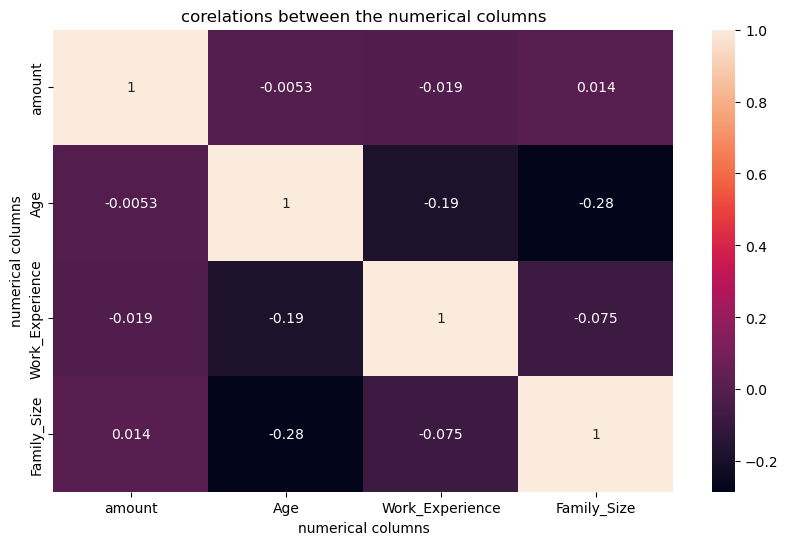

In [42]:
#realtionship between the columns
numerical_columns = company_data.corr(numeric_only=True)
print(numerical_columns)

#plotting the heatmap to identify the relations
plt.figure(figsize=(10,6))
sns.heatmap(data=numerical_columns,annot=True)
plt.title("corelations between the numerical columns")
plt.xlabel("numerical columns")
plt.ylabel("numerical columns")

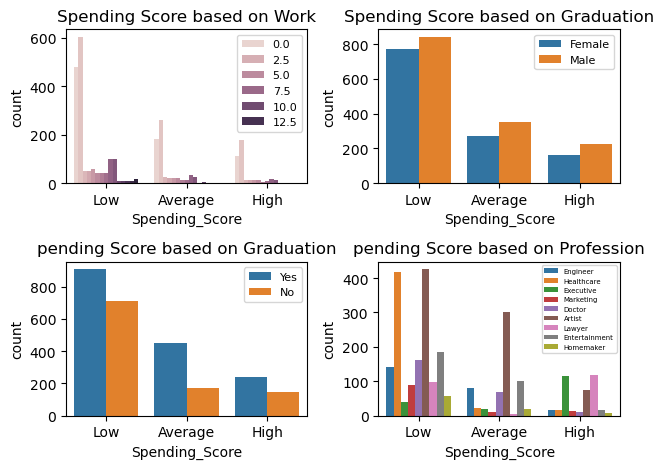

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(hspace=0.7, wspace=0.6)

sns.countplot(data=company_data, x="Spending_Score", hue="Work_Experience", ax=ax[0, 0])
ax[0, 0].set_title("Spending Score based on Work")
ax[0, 0].legend(fontsize=8)

# Plotting the second countplot on the second subplot
profession = company_data["Profession"]
sns.countplot(data=company_data, x="Spending_Score", hue=profession, ax=ax[1,1])
ax[1, 1].set_title("pending Score based on Profession")
ax[1, 1].legend(fontsize=5)

# You can add two more plots to the remaining subplots
sns.countplot(data=company_data, x="Spending_Score", hue="Graduated", ax=ax[1, 0])
ax[1, 0].set_title("pending Score based on Graduation")
ax[1, 0].legend(fontsize=8)

# You can add two more plots to the remaining subplots
sns.countplot(data=company_data, x="Spending_Score", hue="Gender", ax=ax[0, 1])
ax[0, 1].set_title("Spending Score based on Graduation")
ax[0, 1].legend(fontsize=8)

plt.tight_layout()
plt.show()

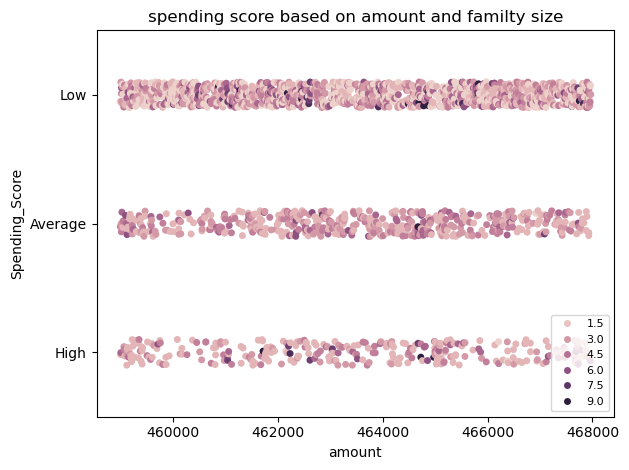

In [67]:
#plotting the distplot for amount 

#plotting the  strip plot
sns.stripplot(data=company_data,x="amount",y="Spending_Score",hue="Family_Size",edgecolor="Black")
plt.legend(fontsize=8)
plt.title("spending score based on amount and familty size")
plt.tight_layout()
plt.show()

#plotting the pie plot for 

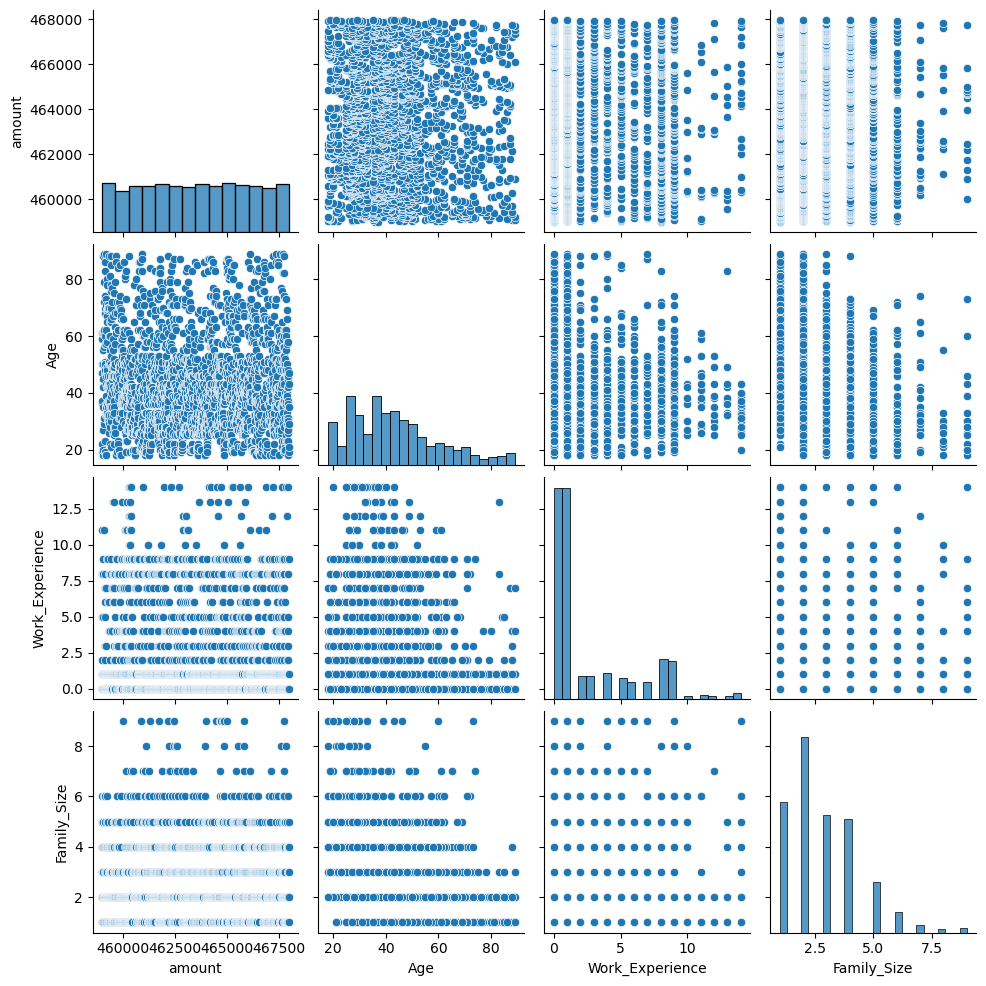

In [65]:
#pairplot 
sns.pairplot(company_data)

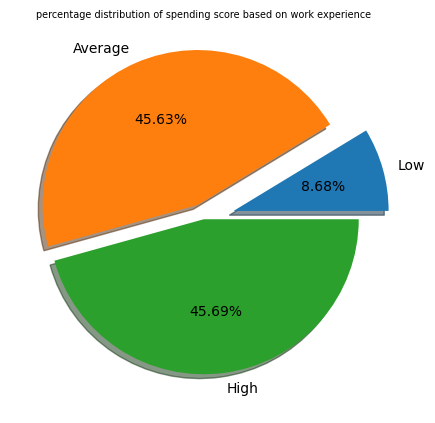

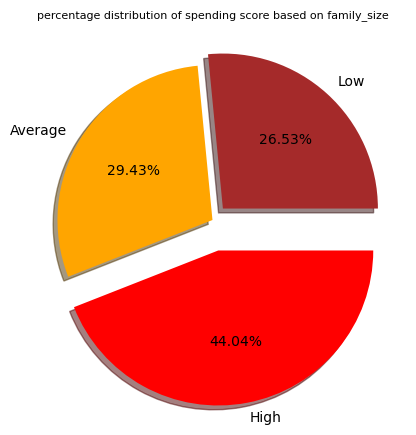

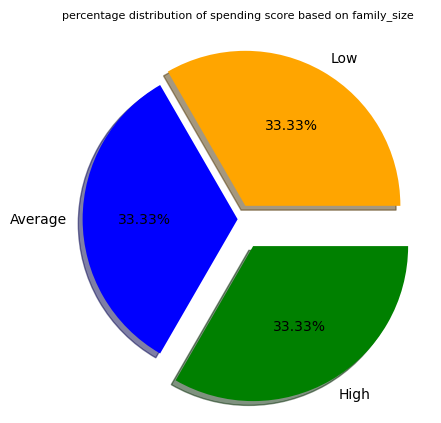

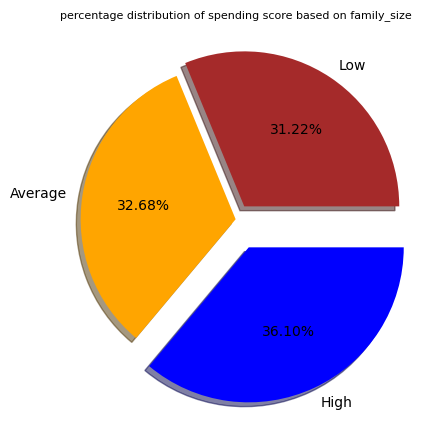

In [69]:
#spending score vs age 

#plot the first pie plot
plt.figure(figsize=(5,6))
wedge_sizes = company_data["Work_Experience"].value_counts().head(3).sort_values()
plt.pie(wedge_sizes, labels=company_data['Spending_Score'].head(3),autopct="%0.2f%%",explode=[0.2,0.1,0.0],shadow=True)
plt.title("percentage distribution of spending score based on work experience",fontsize=7)
plt.show()

#plotting pie
plt.figure(figsize=(5,6))
data = company_data["Family_Size"].value_counts().head(3).sort_values()
plt.pie(data,labels=company_data["Spending_Score"].head(3),autopct="%0.2f%%",colors={'orange','brown','red'},explode=[0.1,0.0,0.2],shadow=True)
plt.title("percentage distribution of spending score based on family_size",fontsize=8)
plt.show()

plt.figure(figsize=(5,6))
data_1 = company_data["amount"].value_counts().head(3).sort_values()
plt.pie(data_1,labels=company_data["Spending_Score"].head(3),autopct="%0.2f%%",colors={'orange','green','blue'},explode=[0.1,0.0,0.2],shadow=True)
plt.title("percentage distribution of spending score based on family_size",fontsize=8)
plt.show()

plt.figure(figsize=(5,6))
data_1 = company_data["Age"].value_counts().head(3).sort_values()
plt.pie(data_1,labels=company_data["Spending_Score"].head(3),autopct="%0.2f%%",colors={'orange','blue','brown'},explode=[0.1,0.0,0.2],shadow=True)
plt.title("percentage distribution of spending score based on family_size",fontsize=8)
plt.show()

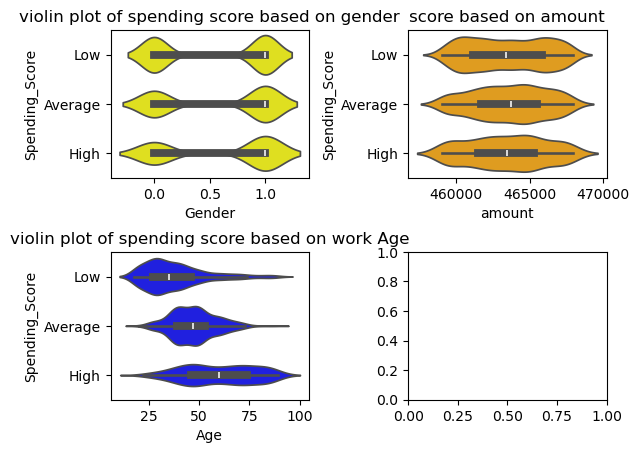

In [225]:
def plot_violin_plot(company_data):
    fig,ax=plt.subplots(nrows=2,ncols=2)
    fig.subplots_adjust(hspace=0.5,wspace=0.5)
    fig_1= sns.violinplot(company_data,x="Gender",y="Spending_Score",color="yellow",ax=ax[0,0])
    fig_2 = sns.violinplot(company_data,x="Age",y="Spending_Score",color="Blue",ax=ax[1,0])
    fig_3 = sns.violinplot(company_data,x="amount",y="Spending_Score",color="orange",ax=ax[0,1])
    ax[0,0].set_title("violin plot of spending score based on gender")
    ax[1,0].set_title("violin plot of spending score based on work Age")
    ax[0,1].set_title("score based on amount")
    

plot_violin_plot(company_data)

In [34]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as io
io.templates.default = "plotly_white"

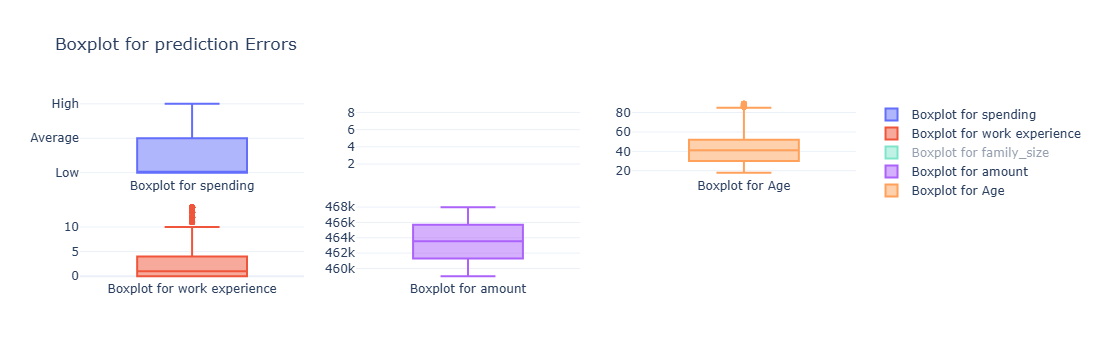

In [383]:
fig = make_subplots(rows=2,cols=3)
def outliers(company_data):
    fig_1 = fig.add_trace(go.Box(y=company_data["Spending_Score"], name='Boxplot for spending'), row=1, col=1)
    fig_2 = fig.add_trace(go.Box(y=company_data["Work_Experience"], name='Boxplot for work experience'), row=2, col=1)
    fig_3 = fig.add_trace(go.Box(y=company_data["Family_Size"], name='Boxplot for family_size'), row=1, col=2)
    fig_4 = fig.add_trace(go.Box(y=company_data["amount"], name='Boxplot for amount'),row=2,col=2)
    fig_5 = fig.add_trace(go.Box(y=company_data["Age"], name='Boxplot for Age'),row=1,col=3)

    fig.update_layout(
        title="Boxplot for prediction Errors",
        plot_bgcolor="White",
        paper_bgcolor="White"
    )
    fig_1.show()

outliers(company_data)

it seems to be lot of outlier in family size and work experience

In [36]:
#finding the IQR
def outliers_handling(company_data):
    q1=company_data.quantile(0.25)
    q3=company_data.quantile(0.75)
    IQR=q3-q1
    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR
    print(q1)
    print(q3)
    return (company_data<lower_bound) & (company_data>upper_bound)
    
outliers = outliers_handling(company_data[["Work_Experience","amount","Family_Size","Age"]])
print(f" number of outliers detected : {np.sum(outliers)}")

Work_Experience         0.0
amount             461162.5
Family_Size             2.0
Age                    30.0
Name: 0.25, dtype: float64
Work_Experience         3.0
amount             465696.0
Family_Size             4.0
Age                    53.0
Name: 0.75, dtype: float64
 number of outliers detected : Work_Experience    0
amount             0
Family_Size        0
Age                0
dtype: int64


In [38]:

company_data.drop(columns="Var_1",inplace=True)

In [40]:
#Libraries required for Kmeans clustering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

In [42]:
#feature selection
company_data_copy = pd.get_dummies(company_data)
print(company_data_copy.columns)

Index(['amount', 'Age', 'Work_Experience', 'Family_Size', 'Gender_Female',
       'Gender_Male', 'Ever_Married_No', 'Ever_Married_Yes', 'Graduated_No',
       'Graduated_Yes', 'Profession_Artist', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_Average',
       'Spending_Score_High', 'Spending_Score_Low'],
      dtype='object')


In [44]:
features = company_data[["Family_Size","Age"]]
features

Family_Size  Age
0             1.0   36
1             4.0   37
2             1.0   69
3             2.0   59
4             4.0   19
...           ...  ...
2622          4.0   29
2623          1.0   35
2624          2.0   53
2625          5.0   47
2626          3.0   43

[2627 rows x 2 columns]

In [46]:
from sklearn.model_selection import train_test_split

class FeatureSplitter:
    def __init__(self, features):
        self.features = features

    def split(self):
        X_train, X_test = train_test_split(self.features, train_size=0.7, test_size=0.3, random_state=42)
        return X_train, X_test

input_features = features
instances = FeatureSplitter(input_features)
X_train, X_test = instances.split()

print(X_train.shape)
print(X_test.shape)

(1838, 2)
(789, 2)


In [47]:
#scaling the train data and test data into one scale
from sklearn.preprocessing import StandardScaler

se=StandardScaler()
X_train_scaled = se.fit_transform(X_train)
X_test_scaled = se.fit_transform(X_test)

print(X_train_scaled)
print(X_test_scaled)

[[-1.18790962 -0.91688367]
 [ 0.81091053  0.15291634]
 [-0.52163624  1.6387497 ]
 ...
 [ 0.81091053  0.15291634]
 [-0.52163624 -0.97631701]
 [ 2.1434573  -1.45178368]]
[[ 1.38306352 -1.51523249]
 [-1.13857049 -0.29927438]
 [-1.13857049 -0.18346884]
 ...
 [ 1.38306352 -1.45732972]
 [ 2.01347202 -0.64669098]
 [-1.13857049  1.03248927]]


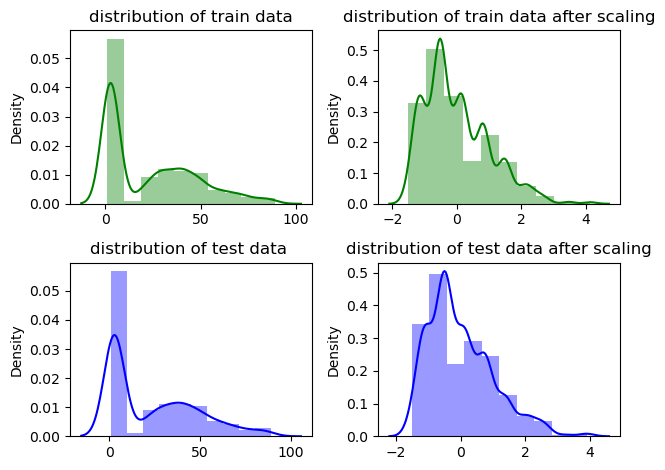

In [50]:
fig, ax = plt.subplots(nrows=2,ncols=2)
fig.subplots_adjust(hspace=0.6,wspace=0.4)

#plotting the train scaled vs train data:
sns.distplot(X_train,kde=True,bins=10,color="Green",ax=ax[0,0])
ax[0,0].set_title("distribution of train data")

sns.distplot(X_train_scaled,kde=True,bins=10,color="Green",ax=ax[0,1])
ax[0,1].set_title("distribution of train data after scaling")

sns.distplot(X_test,kde=True,bins=10,color="blue",ax=ax[1,0])
ax[1,0].set_title("distribution of test data ")

sns.distplot(X_test_scaled,kde=True,bins=10,color="blue",ax=ax[1,1])
ax[1,1].set_title("distribution of test data after scaling")

plt.tight_layout()
plt.show()

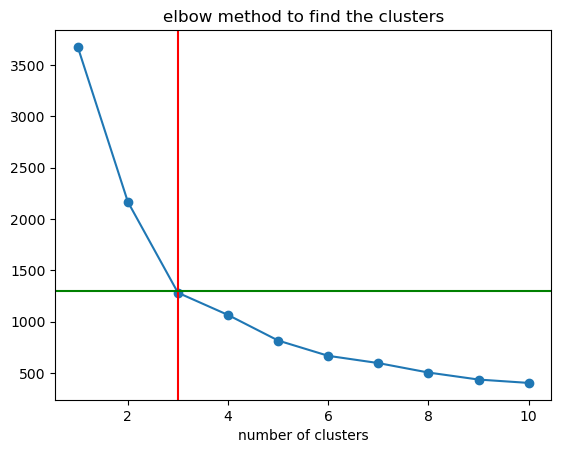

In [52]:
from sklearn.cluster import KMeans

# initializing the empty list where all the cluster get stored
clusters = []
for i in range(1, 11):
    kmeans_model = KMeans(n_clusters=i)
    kmeans_model.fit(X_train_scaled)
    kmeans_predict = kmeans_model.predict(X_test_scaled)
    clusters.append(kmeans_model.inertia_)

plt.plot(range(1,11),clusters,marker="o")
plt.axvline(x=3,color="red")
plt.axhline(y=1300,color="green")
plt.xlabel("number of clusters")
plt.title("elbow method to find the clusters")
plt.show()

In [56]:
parameters = {"max_iter":[100,200,300],
             "init":['k-means++', 'random']}

from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=3)

grid_search = GridSearchCV(kmeans_model, parameters, cv=5,error_score='raise')
grid_search

GridSearchCV(cv=5, error_score='raise', estimator=KMeans(n_clusters=3),
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [100, 200, 300]})

In [58]:
grid_search.fit(X_train_scaled)

GridSearchCV(cv=5, error_score='raise', estimator=KMeans(n_clusters=3),
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [100, 200, 300]})

In [60]:
kmeans_result = grid_search.predict(X_test_scaled)
kmeans_result

array([2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 2, 0,
       2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2, 1, 0, 1, 0,
       0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1,
       0, 1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 1, 2, 0, 0, 0,
       0, 2, 1, 2, 2, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 0,
       1, 2, 2, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 1, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2,
       1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 2, 1,
       2, 0, 1, 1, 2, 2, 0, 1, 0, 0, 1, 2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0,

In [62]:
#finding the labels and clusters centers 
best_parameters = grid_search.best_params_
print(best_parameters)

#get labels and cluster_centers
best_estimators = grid_search.best_estimator_
labels = best_estimators.labels_
cluster_centers = best_estimators.cluster_centers_
print(labels)
print(cluster_centers)

{'init': 'random', 'max_iter': 300}
[0 2 1 ... 2 0 2]
[[-0.53201202 -0.3998335 ]
 [-0.44517863  1.45516054]
 [ 1.30541031 -0.51152976]]


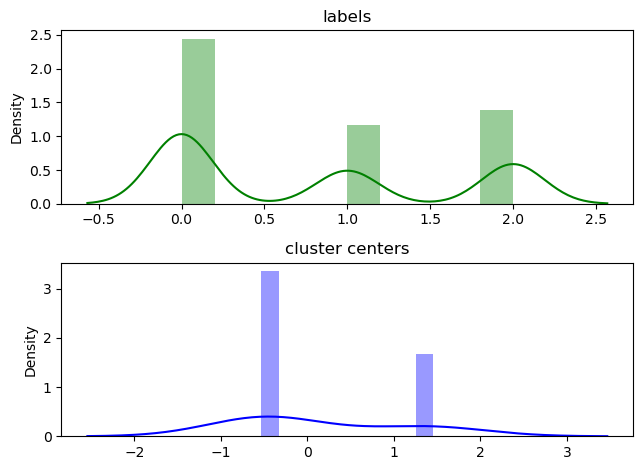

In [64]:
fig, ax = plt.subplots(nrows=2,ncols=1)
fig.subplots_adjust(hspace=0.6,wspace=0.4)

#plotting the train scaled vs train data:
sns.distplot(labels,kde=True,bins=10,color="Green",ax=ax[0])
ax[0].set_title("labels")

sns.distplot(cluster_centers,kde=True,bins=10,color="blue",ax=ax[1])
ax[1].set_title("cluster centers")

plt.tight_layout()
plt.show()

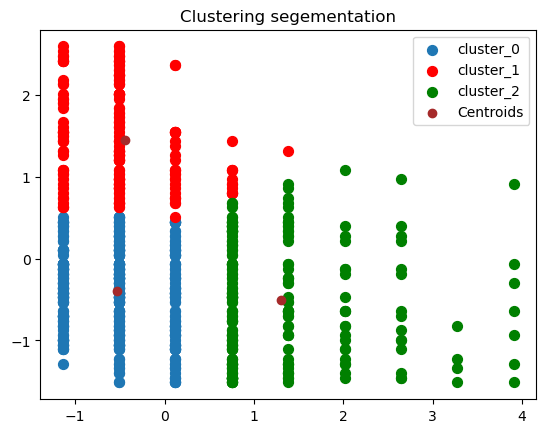

In [66]:
plt.scatter(X_test_scaled[kmeans_result == 0,0],X_test_scaled[kmeans_result == 0,1],s=50,label="cluster_0")
plt.scatter(X_test_scaled[kmeans_result == 1,0],X_test_scaled[kmeans_result == 1,1],s=50,label="cluster_1",color="red")
plt.scatter(X_test_scaled[kmeans_result == 2,0],X_test_scaled[kmeans_result == 2,1],s=50,label="cluster_2",color="green")
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],color="brown",label="Centroids")

plt.title("Clustering segementation")
plt.legend()

In [68]:
def get_clusters(company_data,kmeans_model):
    company_data['Clusters'] = kmeans_model.fit_predict(features)
    company_data['Clusters'] = company_data['Clusters'].astype('category')
    return company_data['Clusters']

company_data["Clusters"] =  get_clusters(company_data,kmeans_model)
company_data

amount  Gender Ever_Married  Age Graduated     Profession  \
0     458989  Female          Yes   36       Yes       Engineer   
1     458994    Male          Yes   37       Yes     Healthcare   
2     458996  Female          Yes   69        No      Homemaker   
3     459000    Male          Yes   59        No      Executive   
4     459001  Female           No   19        No      Marketing   
...      ...     ...          ...  ...       ...            ...   
2622  467954    Male           No   29        No     Healthcare   
2623  467958  Female           No   35       Yes         Doctor   
2624  467960  Female           No   53       Yes  Entertainment   
2625  467961    Male          Yes   47       Yes      Executive   
2626  467968  Female           No   43       Yes     Healthcare   

      Work_Experience Spending_Score  Family_Size Clusters  
0                 0.0            Low          1.0        0  
1                 8.0        Average          4.0        0  
2                 0.0            Low          1.0        1  
3                11.0           High          2.0        2  
4                 1.0            Low          4.0        0  
...               ...            ...          ...      ...  
2622              9.0            Low          4.0        0  
2623              1.0            Low          1.0        0  
2624              1.0            Low          2.0        2  
2625              1.0           High          5.0        2  
2626              9.0            Low          3.0        2  

[2627 rows x 10 columns]

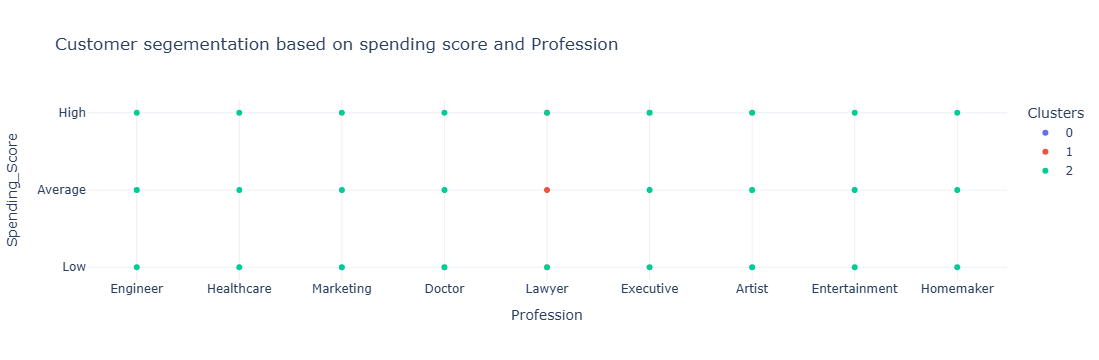

In [70]:
fig = px.scatter(company_data,x='Profession',y='Spending_Score',color="Clusters",title="Customer segementation based on spending score and Profession")

fig.update_layout(
        plot_bgcolor="White",
        paper_bgcolor="White"
    )

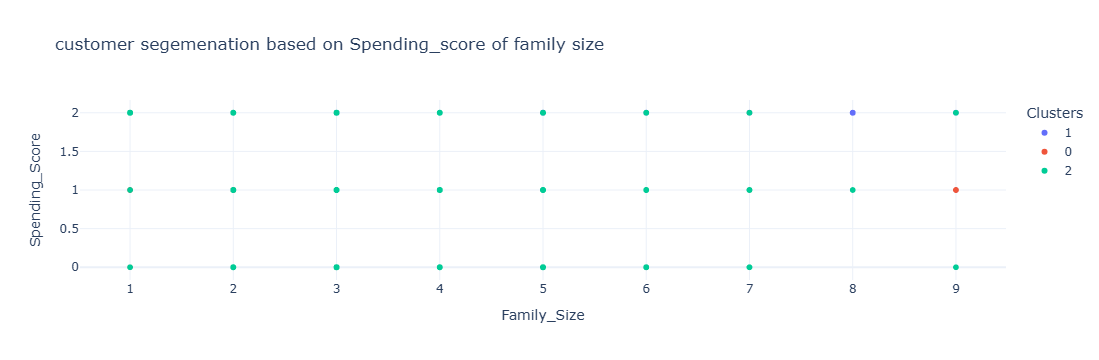

In [167]:
fig = px.scatter(company_data,x='Family_Size',y='Spending_Score',color='Clusters',title="customer segemenation based on Spending_score of family size")

fig.update_layout(
        plot_bgcolor="White",
        paper_bgcolor="White"
    )

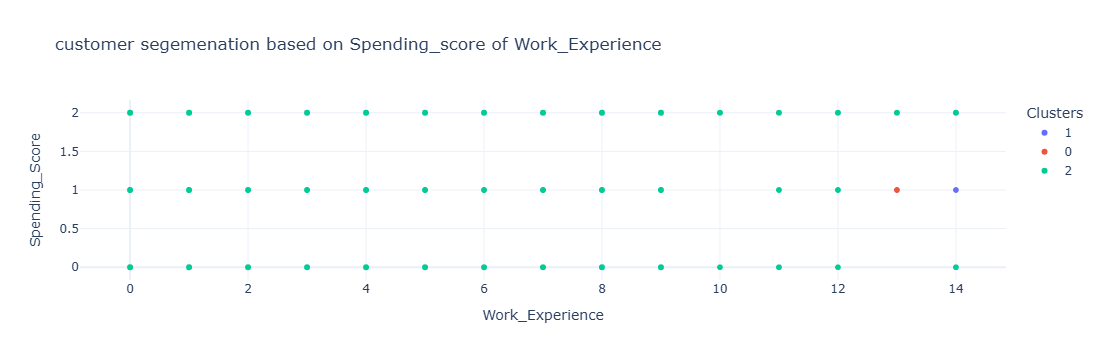

In [169]:
fig = px.scatter(company_data,x='Work_Experience',y='Spending_Score',color='Clusters',title="customer segemenation based on Spending_score of Work_Experience")

fig.update_layout(
        plot_bgcolor="White",
        paper_bgcolor="White"
    )

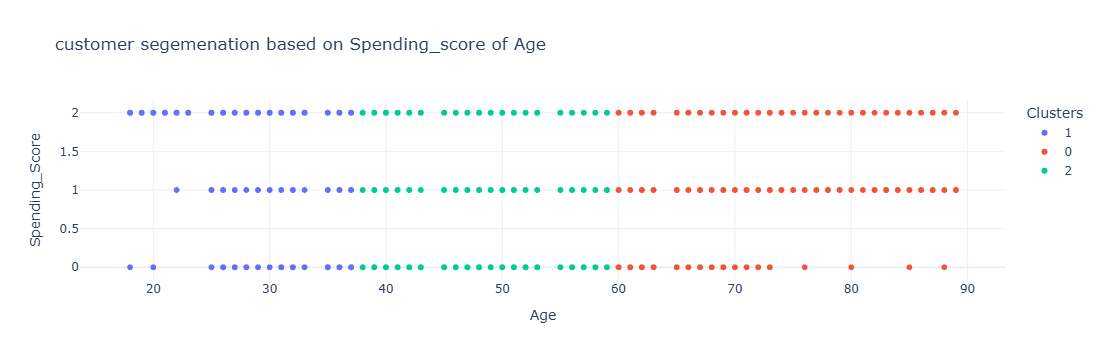

In [171]:
fig = px.scatter(company_data,x='Age',y='Spending_Score',color='Clusters',title="customer segemenation based on Spending_score of Age")

fig.update_layout(
        plot_bgcolor="White",
        paper_bgcolor="White"
    )

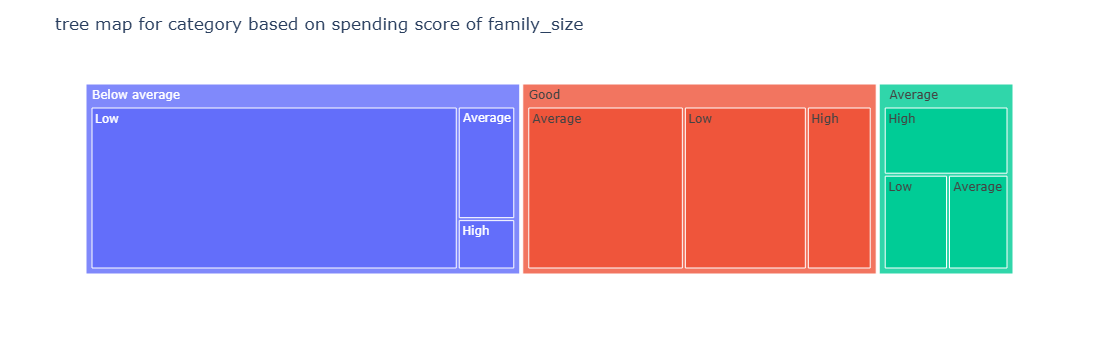

In [165]:
#segmenting the spending score and family size based on catgeory
fig = px.treemap(
    company_data,path=["Category",'Spending_Score'],values="Family_Size"
)

fig.update_layout(
    paper_bgcolor="white",
    plot_bgcolor="white",
    title="tree map for category based on spending score of family_size"
)

fig.show()

In [72]:
#mapping the cluster into category  data 
def category_mapping(company_data):
    company_data["Category"] = company_data['Clusters'].map({0:'Below average',
                             1:' Average',
                             2:'Good'})
    return company_data["Category"]

#calling the functions again
category_mapping(company_data)

0       Below average
1       Below average
2             Average
3                Good
4       Below average
            ...      
2622    Below average
2623    Below average
2624             Good
2625             Good
2626             Good
Name: Category, Length: 2627, dtype: category
Categories (3, object): ['Below average', ' Average', 'Good']

In [127]:
try:
    company_data.to_csv(r"C:\Users\Dell\Desktop\codsoft task\Segmentation.csv",index=False)
    print("data has been added to task directory")
except Exception as e:
    raise ValueError("data has not been saved occuring some error",e)

#view the the file from task directory
file_path = r"C:\Users\Dell\Desktop\codsoft task\Segmentation.csv"
with open(file_path,'r') as data:
    data = pd.read_csv(file_path)
    print(data.columns)

if data.columns.any() == company_data.columns.any():
    print("data has been perfectly saved with equal columns")
else:
    print("error")

data has been added to task directory
Index(['amount', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Clusters',
       'Category'],
      dtype='object')
data has been perfectly saved with equal columns
